# **JOB ROLE PREDICTION USING RESUME**
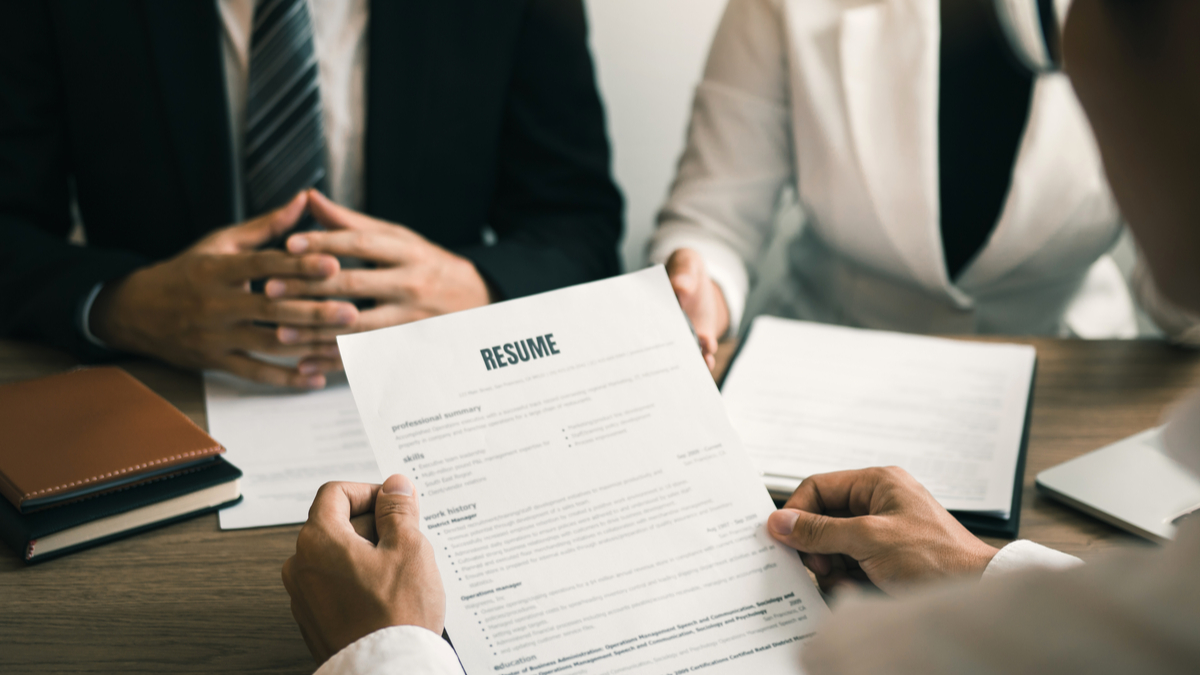

In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk


In [287]:
data=pd.read_csv('/content/UpdatedResumeDataSet.csv',encoding='utf-8')
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [288]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [289]:
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [291]:
data.columns

Index(['Category', 'Resume'], dtype='object')

In [292]:
data.dtypes

Category    object
Resume      object
dtype: object

In [293]:
data.isna().sum()

Category    0
Resume      0
dtype: int64

In [294]:
data.shape

(962, 2)

In [295]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [296]:
cat=data['Category'].value_counts()
cat

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

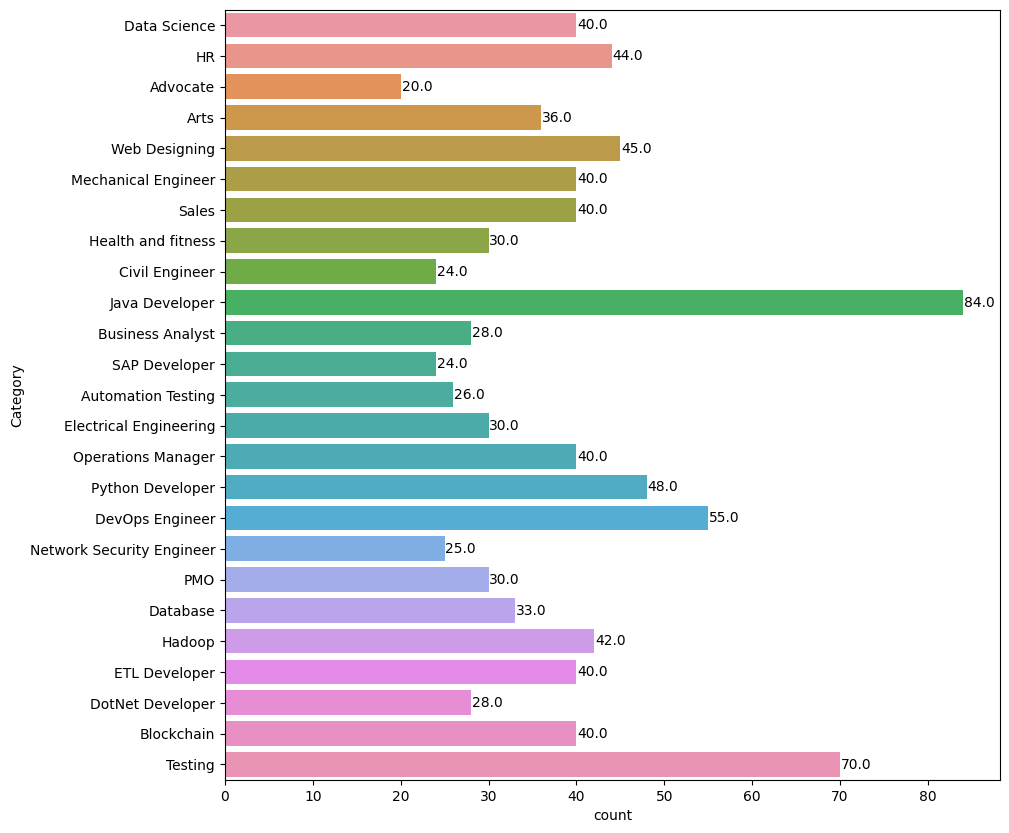

In [327]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Category'])
ax=plt.gca()
for i in ax.patches:
    ax.text(i.get_width()+0.1,i.get_y()+i.get_height()/2,f'{i.get_width()}',ha='left',va='center')
plt.show()


In [298]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('owm-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [299]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Category_Label']=le.fit_transform(data['Category'])
data

,Category,Resume,Category_Label
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,23
958,Testing,â Willingness to accept the challenges. â ...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,23


In [300]:
category=pd.DataFrame({'Category':data['Category'],'Category_Label':data['Category_Label']})
category.drop_duplicates().reset_index(drop=True)


,Category,Category_Label
0,Data Science,6
1,HR,12
2,Advocate,0
3,Arts,1
4,Web Designing,24
5,Mechanical Engineer,16
6,Sales,22
7,Health and fitness,14
8,Civil Engineer,5
9,Java Developer,15


In [301]:
resume=data['Resume']
resume

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [302]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
resume=resume.apply(lambda x:' '.join([i for i in tk.tokenize(x)]))
resume

0      Skills * Programming Languages : Python ( pand...
1      Education Details May 2013 to May 2017 B . E U...
2      Areas of Interest Deep Learning , Control Syst...
3      Skills â  ¢ R â  ¢ Python â  ¢ SAP HANA â ...
4      Education Details MCA YMCAUST , Faridabad , Ha...
                             ...                        
957    Computer Skills : â  ¢ Proficient in MS offic...
958    â   Willingness to accept the challenges . â...
959    PERSONAL SKILLS â  ¢ Quick learner , â  ¢ Ea...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP / 7/8 /8 . 1/10 Databa...
Name: Resume, Length: 962, dtype: object

In [303]:
resume=resume.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-303-230049f5ee73>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  resume=resume.str.replace('[^a-zA-Z0-9]+',' ')


In [304]:
resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to accept the challenges Positive...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [305]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
resume=resume.apply(lambda x:' '.join([i for i in tk.tokenize(x.lower()) if i not in stop]))
resume

0      skills programming languages python pandas num...
1      education details may 2013 may 2017 b e uit rg...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge ms power po...
961    skill set os windows xp 7 8 8 1 10 database my...
Name: Resume, Length: 962, dtype: object

In [306]:
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
resume=resume.apply(lambda x:' '.join([ss.stem(i) for i in tk.tokenize(x)]))
resume

0      skill program languag python panda numpi scipi...
1      educ detail may 2013 may 2017 b e uit rgpv dat...
2      area interest deep learn control system design...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici ms offic word basic excel...
958    willing accept challeng posit think good learn...
959    person skill quick learner eager learn new thi...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
vct=TfidfVectorizer()
x=vct.fit_transform(resume)
x

<962x5478 sparse matrix of type '<class 'numpy.float64'>'
	with 151712 stored elements in Compressed Sparse Row format>

In [308]:
print(x)

  (0, 3326)	0.030407883464630286
  (0, 788)	0.027390324283368395
  (0, 328)	0.023725207582954315
  (0, 2445)	0.04523598042354346
  (0, 463)	0.0465928569503858
  (0, 283)	0.023129512410661194
  (0, 2530)	0.0465928569503858
  (0, 4776)	0.02258599656645727
  (0, 1761)	0.02695242053401081
  (0, 5198)	0.01550329850812341
  (0, 4719)	0.03169740915482615
  (0, 2959)	0.0110381029354677
  (0, 2425)	0.040724986450007196
  (0, 1893)	0.0465928569503858
  (0, 914)	0.03919981398542605
  (0, 572)	0.03793643661942844
  (0, 1330)	0.03841674627643545
  (0, 4812)	0.023003370125455197
  (0, 2033)	0.03793643661942844
  (0, 1781)	0.017568580943255124
  (0, 3247)	0.020048614832993025
  (0, 310)	0.02848137910092515
  (0, 3354)	0.029760325945478096
  (0, 4338)	0.018229846730524545
  (0, 4512)	0.030933434699603624
  :	:
  (961, 447)	0.03269858568478258
  (961, 1707)	0.035866294669224454
  (961, 4943)	0.059150885153093295
  (961, 595)	0.03614804841106143
  (961, 1469)	0.01951446497576632
  (961, 1224)	0.03665524

In [309]:
x.shape

(962, 5478)

In [310]:
y=data['Category'].values
y.shape

(962,)

In [311]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((673, 5478), (289, 5478))

In [312]:
y_train.shape,y_test.shape

((673,), (289,))

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
nb=MultinomialNB()
svc=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=6,criterion='entropy')


In [314]:
lst=[knn,nb,svc,dt,rf]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('accuracy : ',accuracy_score(y_test,y_pred))
  print('report : ',classification_report(y_test,y_pred))
  print('-------------------------------------------------------------------------')



KNeighborsClassifier(n_neighbors=7)
accuracy :  0.9688581314878892
report :                             precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      0.67      0.80         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       0.90      0.82      0.86        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.89      0.94        19
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      0.94     

**All of these models have good accuracy, precision and recall.**
**So we can use any of these models.**

# **Random Predictions**

In [315]:
import pickle

Pickle is a Python module for easy serializing and deserializing of machine learning models.This allows you to save trained models to a file after training, and later load them for making predictions without the need to retrain the model each time the program runs.

In [316]:
pickle.dump(vct,open('vct.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(rf,open('randomforest.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [317]:
resume1="""Areas of Interest Deep Learning, Control System Design, Programming in-Python,
Electric Machinery, Web Development,
Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish,
Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView,
Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter NoMySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Debian-Kali Linux Education Details
January 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology
January 2015 DEEKSHA CENTER
January 2013 Little Flower Public School
August 2000 Manipal Academy of Higher
DATA SCIENCE
DATA SCIENCE AND ELECTRICAL ENTHUSIAST
Skill Details
Data Analysis- Exprience - Less than 1 year months
excel- Exprience - Less than 1 year months
Machine Learning- Exprience - Less than 1 year months
mathematics- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
Matlab- Exprience - Less than 1 year months
Electrical Engineering- Exprience - Less than 1 year months
Sql- Exprience - Less than 1 year monthsCompany Details
company - THEMATHCOMPANY
description - I am currently working with a Casino based operator(name not to be disclosed) in Macau.
I need to segment the customers who visit their property based on the value the patrons bring into the company.
Basically prove that the segmentation can be done in much better way than the current system which they have with proper numHenceforth they can implement target marketing strategy to attract their customers who add value to the business."""

In [318]:
# Load the trained classifier
rf=pickle.load(open('randomforest.pkl','rb'))

# Clean the input resume
cleaned_resume=resume1.replace('[^a-zA-Z0-9]+',' ')

# Transform the cleaned resume using the trained TfidfVectorizer
input_features=vct.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id=rf.predict(input_features)[0]
print(prediction_id)

Data Science


In [319]:
resume2="""Education Details
 January 2005 S.S.C Baramati, Maharashtra M.E.S. Highschool
 B.E. Civil Engineering Pune, Maharashtra Singhad Institute Of Technology And Science
civil site engineer
Civil engineer
Skill Details
Site Engineer- Exprience - 60 monthsCompany Details
company - Vasundhara nirmiti properties
description - Civil engineer
company - shri balaji housing company
description - Execution of all civil work
company - Ganesh construction
description - Site engineer"""

In [320]:
knn=pickle.load(open('knn.pkl','rb'))
cleaned_resume=resume2.replace('[^a-zA-Z0-9]+',' ')
input_features=vct.transform([cleaned_resume])
prediction_id=knn.predict(input_features)[0]
print(prediction_id)

Civil Engineer


In [321]:
resume3="""Education Details
 B.Com, LL.B.,   University of Clacutta, University of Burdwan
Skill Details
Taxation matters Income Tax GST P Tax Accounts- Exprience - Less than 1 year months
Filing of Income Tax Returns GST Returns e-TDS AIR and more- Exprience - Less than 1 year monthsCompany Details
company - own practice
description -Drafting and preparation of plaint, Accounts and move before relevant Authority to hear the cases"""

In [322]:
cleaned_resume=resume3.replace('[^a-zA-Z0-9]+',' ')
input_features=vct.transform([cleaned_resume])
prediction_id=rf.predict(input_features)[0]
print(prediction_id)

Advocate


In [323]:
resume4="""Education Details
August 2018 to January 2021 Entermediate Maths Mumbai, Maharashtra Sunbeam academy , samne ghat , varanasi
Martial arts (fitness job)
Skill Details
Company Details
company - Sports Authority
description - I am 2nd dan black belt in karate (martial arts)
I am in a searching of personal trainer job for fitness.
I won 3 gold medals in national karate championship.
I won 7 gold medals in state karate championship.
3 times best player of the year of uttar pradesh award ..
Represented india and Selected for world karate championship held at Croatia , Europe."""

In [324]:
svc=pickle.load(open('svc.pkl','rb'))
cleaned_resume=resume4.replace('[^a-zA-Z0-9]+',' ')
input_features=vct.transform([cleaned_resume])
prediction_id=svc.predict(input_features)[0]
print(prediction_id)

Arts


In [325]:
resume5="""ANUSREE KANNAN P V
Motivated, diligent and responsible postgraduate seeking an opportunity to
become a data scientist. Excellent teamwork, interpersonal and communicational
skills. Looking to start a career as an entry-level professional with a reputed IT
company.
PROFILE SUMMARY
Date of Birth Oct 07, 1999
Gender Female
EDUCATION HISTORY
Post Graduation
Course MS/M.Sc(Science)( Statistics )
College University of Calicut, Kozhikode
Year of Passing 2022
Grade 8.1/10
Graduation
Course B.Sc( Maths )
College Kannur University
Year of Passing 2020
Grade 8.9/10
Marital Status Single
SKILLS
Communication Skills
Problem Solving
Teamwork
Leadership Skills
WORK EXPERIENCE
May 2023 to Present
Data Science Intern at Luminar Technolab
TECHNICAL SKILLS
Oct 2022 to Jan 2023
Hadoop
MySQL
Python
Python Developer Intern at Inmakes Infotech Pvt.Lt
d.
Data Cleaning
Machine Learning
Natural Language Processing
Seaborn
Matplotlib
LANGUAGES KNOWN
Malayalam
English
Tamil
Hindi
PROJECTS
A STATISTICAL STUDY ON AGRICULTURAL PRODUCTI
ON IN KERALA, 1 Months"""

In [326]:
cleaned_resume=resume5.replace('[^a-zA-Z0-9]+',' ')
input_features=vct.transform([cleaned_resume])
prediction_id=svc.predict(input_features)[0]
print(prediction_id)

Data Science
